In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt

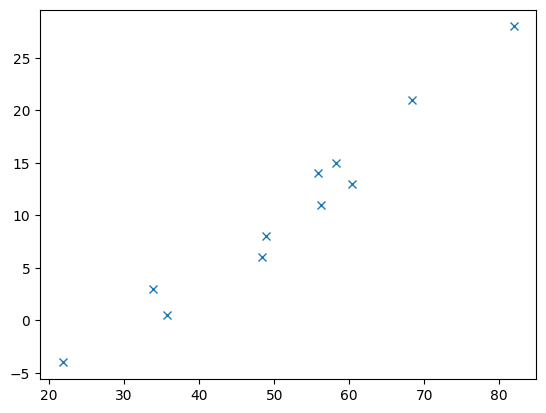

In [31]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
np.savetxt("vl5_data.csv", np.c_[t_c, t_u])
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
plt.plot(t_u,t_c,'x')
plt.show()

In [32]:
def model(t_u, w, b):
    return w * t_u + b

In [33]:
def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

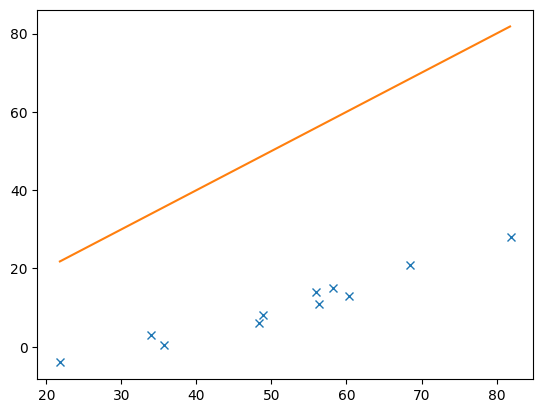

tensor(1763.8848)


In [34]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
plt.plot(t_u,t_c,'x')
x = torch.arange(t_u.min(), t_u.max())
y = model(x, w, b)
plt.plot(x,y)
plt.show()
loss = loss_fn(t_p, t_c)
print(loss)

In [35]:
# x = torch.ones(())
# y = torch.ones(3,1)
# z = torch.ones(1,3)
# a = torch.ones(4, 1, 1)

# print((x*y).shape)
# print((x*z).shape)
# print((y*z*a).shape)

In [36]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)


loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

loss = 1763.884765625
loss = 1565.7613525390625
loss = 1379.6480712890625
loss = 1205.5443115234375
loss = 1043.4501953125
loss = 893.3658447265625
loss = 755.2914428710938
loss = 629.2264404296875
loss = 515.1713256835938
loss = 413.1257629394531
loss = 323.0900573730469
loss = 245.06402587890625
loss = 179.0477752685547
loss = 125.04118347167969
loss = 83.0442886352539
loss = 53.05709457397461
loss = 35.0796012878418
loss = 29.111799240112305
loss = 35.15370559692383
loss = 53.2053108215332


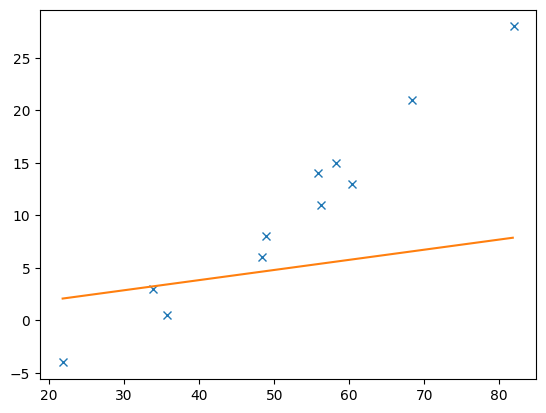

In [37]:
learning_rate = 1e-5
for i in range(20):
    t_p = model(t_u, w, b)
    print(f'loss = {loss_fn(t_p, t_c)}')
    w = w - learning_rate * loss_rate_of_change_w
    b = b - learning_rate * loss_rate_of_change_b

t_p = model(t_u, w, b)
plt.plot(t_u,t_c,'x')
x = torch.arange(t_u.min(), t_u.max())
y = model(x, w, b)
plt.plot(x,y)
plt.show()


In [38]:
def dloss_fn(t_p, t_c):
    return 2*(t_p-t_c) / t_p.size(0)

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [39]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()]) # vektoraddition

In [40]:

# def training_loop(n_epochs, learning_rate, params, t_u, t_c):
#     for epoch in range(1, n_epochs + 1):
#         w, b = params

#         t_p = model(t_u, w, b)  # <1>
#         loss = loss_fn(t_p, t_c)
#         grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

#         params = params - learning_rate * grad

#         print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
#     return params

In [41]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [42]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
    Params: tensor([2568.4011,   45.1637])
    Grad:   tensor([-261257.4062,   -4598.9702])
Epoch 3, Loss 19408029696.000000
    Params: tensor([-148527.7344,   -2616.3931])
    Grad:   tensor([15109614.0000,   266155.6875])
...
Epoch 10, Loss 90901105189019073810297959556841472.000000
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8590e+19, -3.2746e+17])
    Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

In [43]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105247
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022667
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

In [44]:
t_un = 0.1 * t_u

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030489
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])


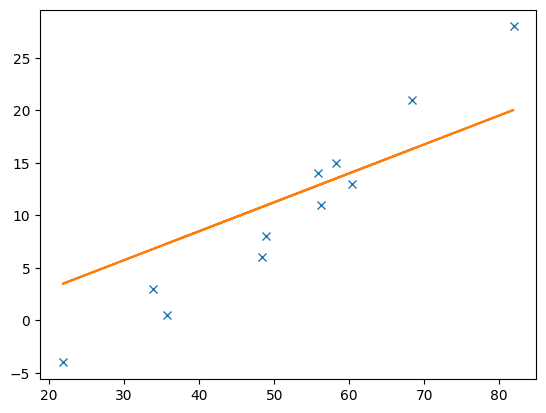

In [45]:
params = training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, # <1>
    t_c = t_c)

plt.plot(t_u,t_c,'x')
t_p = model(t_un, params[0], params[1])
plt.plot(t_u,t_p)
plt.show()

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
...
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
...
Epoch 99, Loss 22.214186
Epoch 100, Loss 22.148710
...
Epoch 4000, Loss 2.927680
Epoch 5000, Loss 2.927648


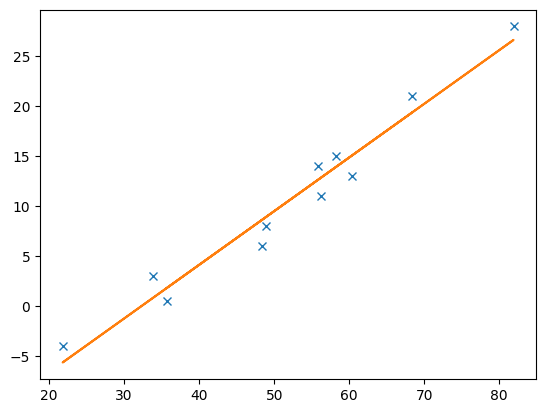

In [46]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)
plt.plot(t_u,t_c,'x')
t_p = model(t_un, params[0], params[1])
plt.plot(t_u,t_p)
plt.show()

m=0.53677146014588, b=-17.304761039885125


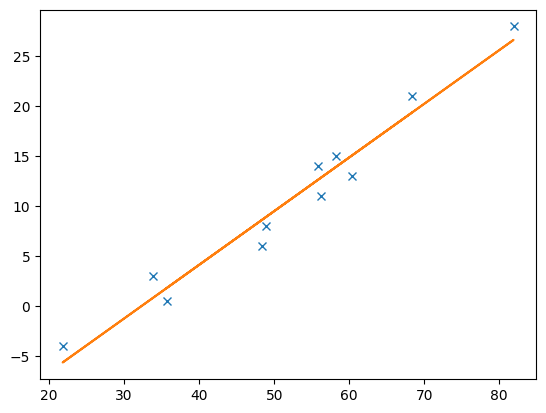

In [47]:
import numpy as np
x = t_u.numpy()
y = t_c.numpy()
m = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x) ** 2)
b = (np.sum(y) - m *np.sum(x)) / len(x)
print(f'm={m}, b={b}')
plt.plot(t_u,t_c,'x')
t_p = model(t_u, m, b)
plt.plot(t_u,t_p)
plt.show()

In [48]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

def model(t_u, w, b):
    return w*t_u+b

def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

print(params.grad)

loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

print(params.grad)


None
tensor([4517.2969,   82.6000])


In [49]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()

        t_p = model(t_u, *params)  # <1>
        loss = loss_fn(t_p, t_c)
        # grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [50]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        with torch.no_grad():
            params -= learning_rate * params.grad
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


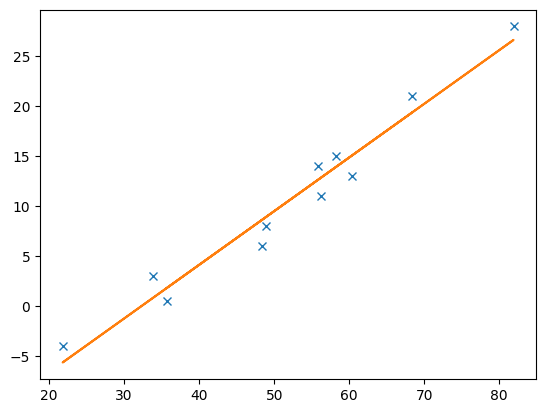

In [51]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = params, 
    t_u = t_un, 
    t_c = t_c)
plt.plot(t_u,t_c,'x')
t_p = model(t_un, params[0], params[1])
plt.plot(t_u.detach().numpy(),t_p.detach().numpy())
plt.show()

In [52]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [53]:
learning_rate = 1e-2
params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()

# print(params)
# optimizer.step()
# print(params)
# optimizer.step()
# print(params)
# optimizer.step()
# print(params)


In [54]:
def training_loop(n_epochs, optimizer, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        # with torch.no_grad():
        #     params -= learning_rate * params.grad
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0 or epoch == 1:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

Epoch 1, Loss 80.364342
Epoch 500, Loss 2.962302
Epoch 1000, Loss 2.927647
Epoch 1500, Loss 2.927645
Epoch 2000, Loss 2.927646
Epoch 2500, Loss 2.927646
Epoch 3000, Loss 2.927646
Epoch 3500, Loss 2.927646
Epoch 4000, Loss 2.927646
Epoch 4500, Loss 2.927646
Epoch 5000, Loss 2.927645


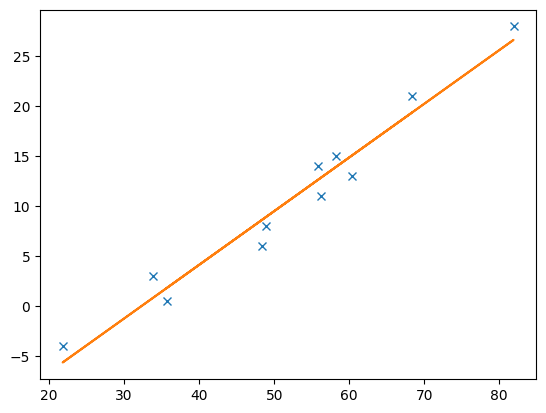

In [55]:
learning_rate = 1e-1
params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()

# params = torch.tensor([1.0, 0.0], requires_grad=True)
params = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    t_u = t_un, 
    t_c = t_c)
plt.plot(t_u,t_c,'x')
t_p = model(t_un, params[0], params[1])
plt.plot(t_u.detach().numpy(),t_p.detach().numpy())
plt.show()

In [56]:
n_samples = t_u.shape[0]
n_val = int(0.5 * n_samples)
print(f'gesamtanzahl = {n_samples}, validierungsanzahl = {n_val}')

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices)
print(val_indices)

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

gesamtanzahl = 11, validierungsanzahl = 5
tensor([ 1,  4,  0,  7, 10,  2])
tensor([3, 5, 8, 9, 6])


In [57]:
def training_loop(n_epochs, optimizer, train_t_u, train_t_c, val_t_u, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        loss = loss_fn(train_t_p, train_t_c)
        # with torch.no_grad():
        #     params -= learning_rate * params.grad
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0 or epoch == 1:
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            print('Epoch %d, Loss %f, val-Loss %f' % (epoch, float(loss), float(val_loss)))
    return params

Epoch 1, Loss 122.778893, val-Loss 34.063694
Epoch 500, Loss 11.787152, val-Loss 16.041374
Epoch 1000, Loss 6.708363, val-Loss 5.082233
Epoch 1500, Loss 4.131504, val-Loss 2.406183
Epoch 2000, Loss 2.824055, val-Loss 3.102963
Epoch 2500, Loss 2.160688, val-Loss 4.919962
Epoch 3000, Loss 1.824109, val-Loss 6.884297
Epoch 3500, Loss 1.653332, val-Loss 8.623503
Epoch 4000, Loss 1.566684, val-Loss 10.034826
Epoch 4500, Loss 1.522725, val-Loss 11.127638
Epoch 5000, Loss 1.500417, val-Loss 11.950474


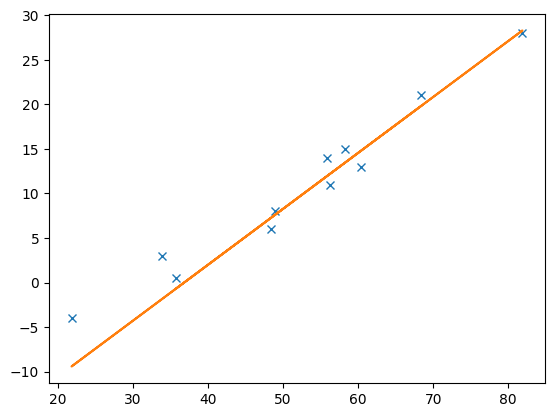

In [29]:
learning_rate = 1e-2
params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()

# params = torch.tensor([1.0, 0.0], requires_grad=True)
params = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    train_t_u = train_t_un, 
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)
plt.plot(t_u,t_c,'x')
t_p = model(t_un, params[0], params[1])
plt.plot(t_u.detach().numpy(),t_p.detach().numpy())
plt.show()